<a href="https://colab.research.google.com/github/Tansihq-jais/Encryptix/blob/main/spam_sms_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('spam.csv', encoding='latin-1')


In [3]:
data = data[['v1', 'v2']]

In [4]:
data.columns = ['label', 'message']

In [5]:
data['label'] = data['label'].map({'spam': 1, 'ham': 0})

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

In [7]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

In [8]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [13]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)

In [14]:
print("SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Performance:
Accuracy: 0.979372197309417
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [15]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

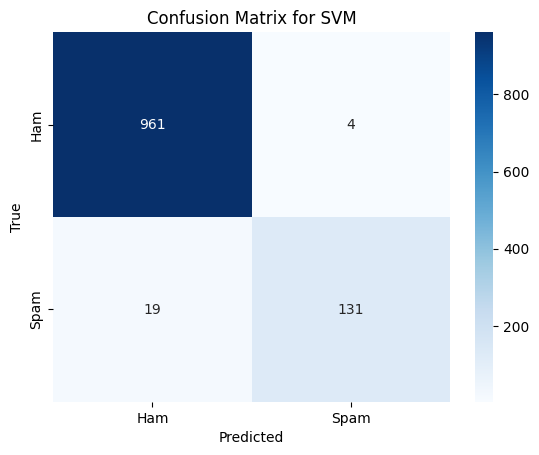

In [16]:
plot_confusion_matrix(y_test, y_pred_svm, "SVM")

In [17]:
new_sms = ["Congratulations! You've won a free ticket to Bahamas. Claim now!",
           "Hey, are we meeting tomorrow for lunch?"]


In [18]:
new_sms_tfidf = tfidf.transform(new_sms)

In [20]:
predictions = svm_model.predict(new_sms_tfidf)

In [21]:
for sms, label in zip(new_sms, predictions):
    print(f'SMS: "{sms}" is classified as {"Spam" if label == 1 else "Legitimate"}')

SMS: "Congratulations! You've won a free ticket to Bahamas. Claim now!" is classified as Spam
SMS: "Hey, are we meeting tomorrow for lunch?" is classified as Legitimate
